In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [21]:
import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

In [5]:
# start date: 7/1/20
# end date: 7/31/20

####################### CONNECT TO DATABASE #######################

database_path = "C:/Users/palan/NW-Data-Science/sqlalchemy-challenge/Data/hawaii.sqlite"

# connecting to sqllite database by intializing enginge object
engine = create_engine(f"sqlite:///{database_path}")
conn = engine.connect()

# extracting sqllite tables data
station_data = engine.execute("SELECT * FROM station")
measurement_data = engine.execute("SELECT * FROM measurement")

# mapping sqllite tables to data frames
# station_df = pd.read_sql("SELECT * FROM station", conn)
# measurement_df = pd.read_sql("SELECT * FROM measurement", conn)

print('\nSuccessfully connected to database & engine object initialized.\n')


Successfully connected to database & engine object initialized.



In [6]:
####################### REFLECT TABLES TO CLASSES #######################

# declare a base using `automap_base()`
base = automap_base()

# create a session
session = Session(engine)

# use the base class to reflect the database tables
base.prepare(engine, reflect=True)

# map classes to base
Measurement = base.classes.measurement
Station = base.classes.station

print('\nSuccessfully reflected tables onto classes.\n')


Successfully reflected tables onto classes.



In [7]:
# visualize station dataframe to find Honolulu station
station_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [8]:
# visualize measurements dataframe to understand columns
measurement_df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


# Exploratory Climate Analysis

In [42]:
# get first & last date in table to set bounds of date search
last_date_query = "SELECT MAX(date) FROM measurement;"
last_date_result = pd.DataFrame(engine.execute(last_date_query).fetchall())
last_date = pd.to_datetime(last_date_result[0][0])
first_date = last_date - timedelta(days=365)

# convert datetime to string
last_date = str(last_date)
last_date = last_date[:10]
first_date = str(first_date)
first_date = first_date[:10]

#query for precipitation data
prcp_results = engine.execute(f"SELECT date, prcp FROM measurement WHERE date BETWEEN '{first_date}' AND '{last_date}'")
prcp_df = pd.DataFrame(prcp_results,columns=['Date', 'Precipitation'])
prcp_df['Date'] = pd.to_datetime(prcp_df['Date'])

# group by date & summarize by average precipitation
prcp_df = pd.DataFrame(prcp_df.groupby('Date')['Precipitation'].mean())
prcp_df = prcp_df.sort_values(by='Date', ascending = True)

prcp_df

,Precipitation
Date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


Text(0.5, 1.0, 'Hawaii Precipitation Over Time')

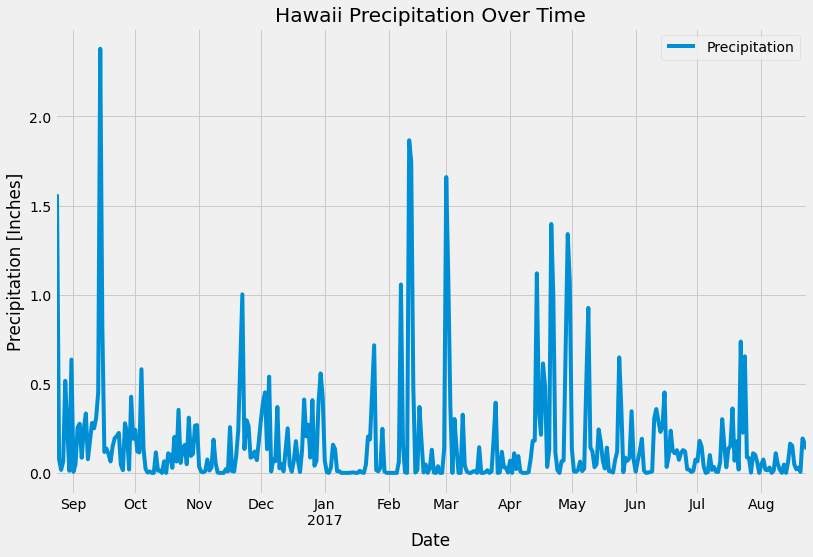

In [43]:
####################### CREATE PRECIPITATION OVER TIME PLOT #######################

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(kind = 'line', figsize = (12,8))
plt.xlabel("Date") 
plt.ylabel("Precipitation [Inches]")
plt.title("Hawaii Precipitation Over Time")

In [45]:
####################### CREATE SUMMARY PRECIPITATION DATAFRAME ########################## 

# Use Pandas to calcualte the summary statistics for the precipitation data
stats_prcp_df = prcp_df.agg(['mean','median','std','min','max'])
stats_prcp_df = stats_prcp_df.rename(columns={"prcp": "Precipitation [Inches]"})

stats_prcp_df

,Precipitation
mean,0.170757
median,0.070000
std,0.295683
min,0.000000
max,2.380000


In [53]:
####################### GET COUNT OF STATIONS ##########################

# mapping sqllite tables to data frames
station_df = pd.read_sql("SELECT * FROM station", conn)
count_stations = station_df['station'].nunique()

# get count of unique stations
unique_station_query = "SELECT COUNT(DISTINCT station) FROM station;"
unique_station_result = pd.DataFrame(engine.execute(unique_station_query).fetchall())
unique_station_result = unique_station_result[0][0]

print(f"\nCount of total unique stations: {unique_station_result}\n")


Count of total unique stations: 9



In [54]:
# create a data frame with all measurement data
measurement_df = pd.read_sql("SELECT * FROM measurement", conn)

# grouby to idenitfy the most active stations by measurement count
active_df = pd.DataFrame(measurement_df.groupby('station')['tobs'].count())

# sort station by measurement activity
active_df = active_df.sort_values(by='tobs', ascending = False)

# rename precipitation measurement column to count
active_df = active_df.rename(columns={"tobs": "Count"})

print(f'\nMost active station based on measurement count: {active_df.index[0]}\n')

active_df


Most active station based on measurement count: USC00519281



,Count
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [39]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_df = measurement_df[measurement_df['station'] == 'USC00519281']

stats_most_active_df = pd.DataFrame(most_active_df['tobs'].agg(['min','mean','max']))

stats_most_active_df

,tobs
min,54.000000
mean,71.663781
max,85.000000


In [43]:
# group by date & summarize by average precipitation
tobs_df = most_active_df[['date','tobs']].sort_values(by='date', ascending = True)
tobs_df = tobs_df.rename(columns={"tobs": "Temperature Observation Data [F]"})

# extract only date & percipitation data; extract last 12 months (i.e. 365 days) of data
tobs_df = tobs_df.tail(365)

# display the last 10 dates within dataframe
tobs_df.tail(10)

tobs_df.head(n=3)


,date,Temperature Observation Data [F]
14594,2016-08-10,82.0
14595,2016-08-11,80.0
14596,2016-08-12,76.0


In [ ]:
####################### CREATE TOBS OVER TIME PLOT #######################

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(kind = 'line', figsize = (12,8))
plt.xlabel("Date") 
plt.ylabel("Precipitation [Inches]")
plt.title("Hawaii Precipitation Over Time")

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
